In [260]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import json

In [261]:
df=pd.read_csv("train.tsv",sep='\t')

In [262]:
df.head(3)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1


In [263]:
print(df.shape)

(7395, 27)


In [264]:
df_train=df[["boilerplate","label"]]

In [265]:
df_train['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_train['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df_train['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_train['boilerplate']=df_train['boilerplate'].str.lower()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [266]:
df_train.head()

,boilerplate,label
0,"""ibm sees holographic calls air breathing batt...",0
1,"""the fully electronic futuristic starting gun ...",1
2,"""fruits that fight the flu fruits that fight t...",1
3,"""10 foolproof tips for better sleep "",""body"":""...",1
4,"""the 50 coolest jerseys you didn t know existe...",0


In [267]:
label=df_train['label'].value_counts()
print(label)

1    3796
0    3599
Name: label, dtype: int64


In [268]:
>>> import nltk
>>> nltk.download('punkt')


>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [269]:
def clean_text(text):
    text=re.sub(r'","body":"'," ",text)
    text=re.sub(r'"',"",text)
    text=re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    return text

In [270]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(lines):
    head_lines = list()
    for line in lines:
        line = clean_text(line)
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        line = pattern.sub('', line)
        # remove puntuations
        res = re.sub(r'[^\w\s]', '', line)
        #stop word removaal
          # tokenize the text
        words = word_tokenize(line)
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        words=" ".join(words)
        head_lines.append(words)
    return head_lines

In [271]:
import pandas as pd
from tqdm import tqdm
import re 
from sklearn.model_selection import train_test_split

In [272]:
X=df_train["boilerplate"]
Y=df_train["label"]

In [311]:
x_tr,x_test,y_tr,y_test=train_test_split(X,Y,test_size=0.30,random_state=42,stratify=Y)

x_train,x_cv,y_train,y_cv=train_test_split(x_tr,y_tr,test_size=0.30,random_state=42,stratify=y_tr)

In [274]:
print(x_train.shape,x_cv.shape,x_test.shape)

(3623,) (1553,) (2219,)


In [275]:
x_train

2803    "fashion to freak out friends fake shark attac...
2174    "pic of the day battle of the surfaces pic of ...
5431    "body":"this video segment from the movie all ...
2415    "skunkboyblog 2012 11 weekly wears fuzzy fluff...
1572    "swine flu a false pandemic to sell vaccines e...
                              ...                        
5634    "seasaltwithfood apple crumble ","body":"apple...
1528    "28 uses for everyday items 28 uses for everyd...
6610    "relishing it relishing it","body":"i know i v...
134     "insidershealth glossary definition acne vulga...
839     "wimp pomegranatekernels","this is how you get...
Name: boilerplate, Length: 3623, dtype: object

In [313]:
x_train = CleanTokenize(x_train)

In [314]:
x_cv = CleanTokenize(x_cv)

In [315]:
x_test = CleanTokenize(x_test)

In [316]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import json

In [317]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [318]:
tokenizer = Tokenizer()

In [329]:
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)

In [330]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

67034


In [331]:
max_len = 200

In [332]:
train_padded = pad_sequences(
    train_sequences, maxlen=max_len, truncating="post", padding="post"
)

In [333]:
len(train_padded[0])

200

In [334]:
y_train.shape

(3623,)

In [324]:
cv_sequences = tokenizer.texts_to_sequences(x_cv)
cv_padded = pad_sequences(
    cv_sequences, maxlen=max_len, padding="post", truncating="post"
)

In [325]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(
    test_sequences, maxlen=max_len, padding="post", truncating="post"
)

In [289]:
# !wget https://nlp.stanford.edu/data/glove.twitter.27B.zip

In [290]:
# !unzip glove.twitter.27B.zip

In [291]:
# !ls

In [292]:
embedding_dict = dict()
embedding_dim = 300
with open("glove.42B.300d.txt", "r") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], "float32")
        embedding_dict[word] = vectors
f.close()

In [293]:
embedding_dim=300

In [294]:
vocab_size = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec

In [295]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM,GlobalMaxPool1D,Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [296]:
embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=200,
                            trainable=False)

In [297]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64, dropout=0.2,recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128 ,dropout=0.2,return_sequences=True))
model.add(GlobalMaxPool1D())
#model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 200, 300)          24398100  
                                                                 
 lstm_26 (LSTM)              (None, 200, 64)           93440     
                                                                 
 lstm_27 (LSTM)              (None, 200, 128)          98816     
                                                                 
 global_max_pooling1d_11 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                       

In [299]:
history = model.fit(train_padded,y_tr, batch_size=32, epochs=15, validation_data=(train_padded, y_tr), verbose=1)

Epoch 1/15
162/162 [==============================] - 97s 575ms/step - loss: 0.4655 - acc: 0.7863 - val_loss: 0.4392 - val_acc: 0.8072
Epoch 2/15
162/162 [==============================] - 92s 569ms/step - loss: 0.4295 - acc: 0.8145 - val_loss: 0.4108 - val_acc: 0.8306
Epoch 3/15
162/162 [==============================] - 92s 568ms/step - loss: 0.4147 - acc: 0.8253 - val_loss: 0.3836 - val_acc: 0.8383
Epoch 4/15
162/162 [==============================] - 93s 574ms/step - loss: 0.4024 - acc: 0.8337 - val_loss: 0.3863 - val_acc: 0.8375
Epoch 5/15
162/162 [==============================] - 93s 573ms/step - loss: 0.3797 - acc: 0.8402 - val_loss: 0.3464 - val_acc: 0.8640
Epoch 6/15
162/162 [==============================] - 92s 569ms/step - loss: 0.3628 - acc: 0.8510 - val_loss: 0.3124 - val_acc: 0.8723
Epoch 7/15
162/162 [==============================] - 92s 570ms/step - loss: 0.3383 - acc: 0.8619 - val_loss: 0.2975 - val_acc: 0.8796
Epoch 8/15
162/162 [==============================] - 9

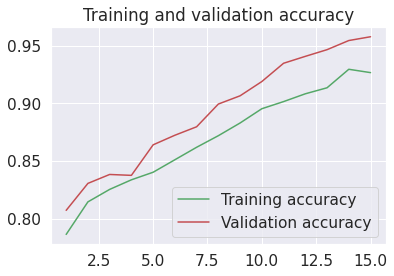

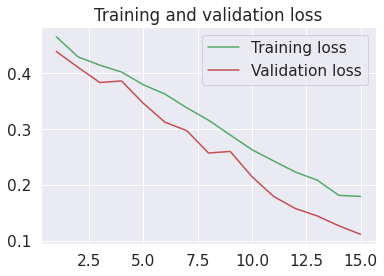

In [300]:
# Plot results
import numpy as np 
import pandas as pd
import os
import re
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()